<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/ndvi_evi_ndwi_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

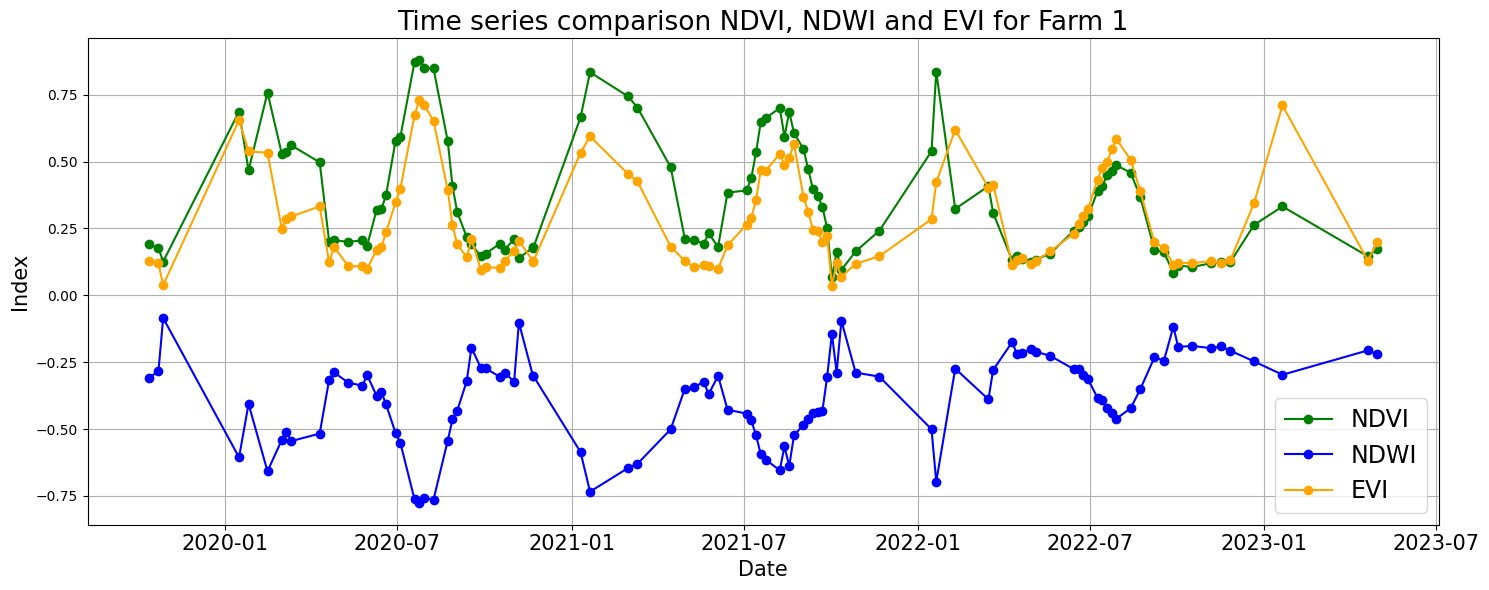

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter



# Load the data
df = pd.read_csv('/content/ndvi-evi-ndwi.csv')

# Rename the columns to "Date" and "NDVI"
df = df.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI', 'ndwi': 'NDWI', 'evi': 'EVI'})

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Generate a regular date range with the desired interval
start_date = df["Date"].min()
end_date = df["Date"].max()
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Reindex the DataFrame with the new date range
df = df.set_index("Date")
#df = df.reindex(date_range)

# Replace missing values with NaN
df["NDVI"] = df["NDVI"].replace(0, np.nan)
df["NDWI"] = df["NDWI"].replace(0, np.nan)
df["EVI"] = df["EVI"].replace(0, np.nan)
# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df))
mask = ~np.isnan(df["NDVI"])
s = [0.35]
interpolated_values_spline = []
spline = UnivariateSpline(x[mask], df["NDVI"][mask], k=3, s=0.35)
interpolated_values_spline.append(spline(x))

# Linearly interpolate missing values
df["NDVI_linear"] = df["NDVI"].interpolate(method='linear')
df["NDWI_linear"] = df["NDWI"].interpolate(method='linear')
df["EVI_linear"] = df["EVI"].interpolate(method='linear')


# Reset the index and rename the columns
df = df.reset_index()
df = df.rename(columns={"index": "Date"})

# Remove rows with missing values
df_trend = df.dropna()



# Plot the original data, interpolated values, SG smoothed, and trend
plt.figure(figsize=(15, 6))


plt.plot(df["Date"], df["NDVI_linear"], "o-", color="green", label="NDVI")
plt.plot(df["Date"], df["NDWI_linear"], "o-", color="blue", label="NDWI")
plt.plot(df["Date"], df["EVI_linear"], "o-",  color="orange", label="EVI")

#plt.scatter(df["Date"], df["NDVI"], marker="x", label="Original", color="red", s=100)


plt.xlabel("Date",fontsize = 15)
plt.ylabel("Index",fontsize =15)
plt.title("Time series comparison NDVI, NDWI and EVI for Farm 1",fontsize = 19)
plt.xticks(rotation=0,fontsize = 15)
plt.legend(prop={"size": 17})
plt.grid(True)
plt.tight_layout()
plt.show()
